In [1]:
import healpy as hp
from lensing_Helper import measure_lensing_xcorr
from halomodelpy import lensing_fit
from halomodelpy import redshift_helper

Deleted outdated persistence file, no further action needed.


Read in catalog with RA, DEC positions of tracers

In [2]:
t = Table.read('../Type1_2_Halos/catalogs/derived/catwise_binned_1.fits')

Set ell bins, read in mask where tracers were observed

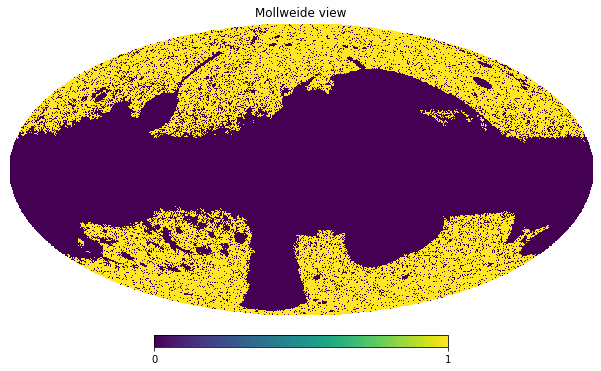

In [3]:
logbins = np.logspace(np.log10(100), np.log10(1000), 10+1).astype(int)

quasar_mask = hp.read_map('../Type1_2_Halos/masks/union.fits')

hp.mollview(quasar_mask)

Perform cross correlation with Planck 2018 lensing map

In [4]:
xcorr = measure_lensing_xcorr.measure_planck_xcorr(logbins, (t['RA'], t['DEC']), quasar_mask, accurate=False, n_noisemaps=10)

Read in redshift distribution of tracers

In [5]:
zs = Table.read('../Type1_2_Halos/catalogs/derived/catwise_cosmos_zs.fits')
dndz = redshift_helper.dndz_from_z_list(zs['Z'], 15)

Fit cross correlation and plot

<AxesSubplot:xlabel='$\\ell$', ylabel='$C_{\\ell}$'>

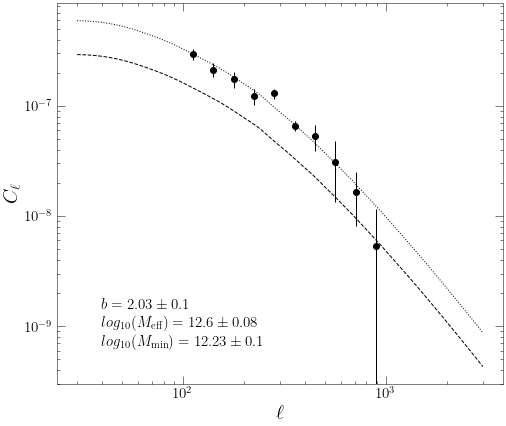

In [6]:
lensing_fit.xcorr_fit_pipeline(dndz, [logbins, xcorr['cl'], xcorr['cl_err']])